<a href="https://colab.research.google.com/github/valec3/Cities/blob/main/Examen_programacion_numerica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alumno: Maye Mamani Víctor Raul

In [ ]:

# librerías para gráficar función 
import numpy as np
import matplotlib.pyplot as plt

# Calculo de las raices reales para el polinomio x^4 - 1

## Crear polinomio

In [ ]:
def polinomio(x, coefficients):
    """
    Función para evaluar el polinomio en un valor dado 'x'.
    'coefficients' es una lista de los coeficientes del polinomio en orden descendente.
    """
    result = 0
    for i, coef in enumerate(coefficients):
        result += coef * (x ** (len(coefficients) - i - 1))
    return result

## Leer archivo

In [ ]:


with open("entrada.txt","r") as archivo:
    Cont_Entrada = archivo.read()
Entrada= Cont_Entrada.split("\n")

Entrada=["4","1 0 0 0 -1"]
coeficientes= list(map(float,Entrada[1].split()))

## Función principal

In [ ]:
def bisection_method(f, a, b, epsilon, max_iterations):
    #if f(a) * f(b) >= 0:
        #raise ValueError("La función no cumple con la condición f(a) * f(b) < 0 en el intervalo dado")
    
    for i in range(max_iterations):
        c = (a + b) / 2
        f_c = f(c)
        
        if abs(f_c) < epsilon or abs(b - a) / 2 < epsilon:
            return c
        
        if f(a) * f_c < 0:
            b = c
        else:
            a = c
    
    return None

In [ ]:
def bisection_method_all_roots(coefficients, a, b, epsilon, max_iterations):
    f = lambda x: sum(a * x**i for i, a in enumerate(coefficients[::-1]))
    roots = []
    
    while len(roots) < 2:
        root = bisection_method(f, a, b, epsilon, max_iterations)
        
        if root is not None:
            roots.append(root)
        a = root
        
            #if len(roots) < len(coefficients) - 1:
                # Actualizar el intervalo de búsqueda excluyendo la raíz encontrada
               # if f(a) * f(root) < 0:
                 #   b = root
              #  else:
               #     a = root
        
        # Ajustar el intervalo para buscar la próxima raíz
        #a = b
        #b += 1.0
    
    return roots

In [ ]:
def newton_raphson_method(f, f_prime, x0, epsilon, max_iterations):
    for i in range(max_iterations):
        f_x0 = f(x0)
        
        if abs(f_x0) < epsilon:
            return x0
        
        x1 = x0 - f_x0 / f_prime(x0)
        
        if abs(x1 - x0) < epsilon:
            return x1
        
        x0 = x1
    
    return None

In [ ]:
def find_complex_roots(coefficients, epsilon, max_iterations):
    f = lambda x: sum(a * x**i for i, a in enumerate(coefficients[::-1]))
    f_prime = lambda x: sum(i * a * x**(i-1) for i, a in enumerate(coefficients[::-1]))
    
    roots = []
    
    for i in range(len(coefficients) - 1):
        a = -1.5
        b = 1.5
        
        # Encontrar una raíz real utilizando el método de la bisección
        root = bisection_method(f, a, b, epsilon, max_iterations)
        
        if root is not None:
            # Utilizar el método de Newton-Raphson para aproximar la raíz compleja
            complex_root = newton_raphson_method(f, f_prime, root + 0.1j, epsilon, max_iterations)
            
            if complex_root is not None:
                roots.append(complex_root)
    
    return roots

In [ ]:
a = -2
b = 2
epsilon = 1e-9
max_iterations = 100

roots = bisection_method_all_roots(coeficientes, a, b, epsilon, max_iterations)
print(roots)

[-1.0, 1.0000000002328306]


In [ ]:
roots_complex = find_complex_roots(coeficientes, epsilon, max_iterations)

In [ ]:
print(roots_complex)

[(-1.00000000000001-4.30446496052075e-14j), (-1.00000000000001-4.30446496052075e-14j), (-1.00000000000001-4.30446496052075e-14j), (-1.00000000000001-4.30446496052075e-14j)]


## Escribir resultado

In [ ]:
conabierto("salida.txt","w")como salida:  
    salida.write(f"raices reales {raíces}")
    salida.write(f"/nraices complejas {raices_complex}")

## Gráficar función

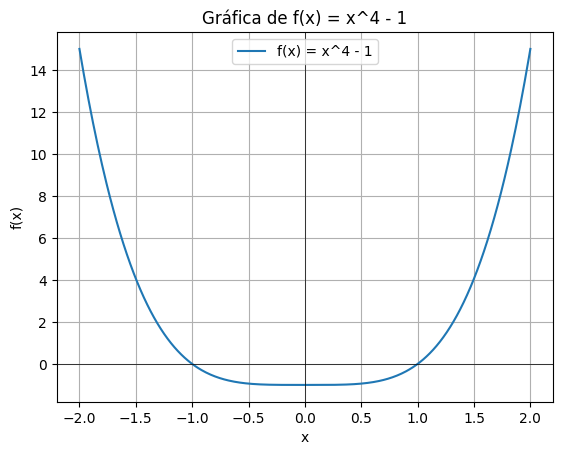

In [ ]:

# Definir la función
def f(x):
    return x**4 - 1

# Generar valores de x en el rango deseado
x = np.linspace(-2, 2, 400)

# Calcular los valores correspondientes de f(x)
y = f(x)

# Graficar la función
plt.plot(x, y, label='f(x) = x^4 - 1')
plt.axhline(0, color='black', linewidth=0.5)  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.5)  # Línea vertical en x=0
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) = x^4 - 1')
plt.legend()
plt.grid(True)
plt.show()

# Calculo de las raices para el polinomio con raices negativas

In [ ]:

coeficientes = [1,4,5,2]
#x^3 + 4x^2 + 5x + 2
a = -3
b = 0
epsilon = 1e-9
max_iterations = 100

roots = bisection_method_all_roots(coeficientes, a, b, epsilon, max_iterations)
print(roots)

[-2.0000000009313226, -1.0000000004656613]


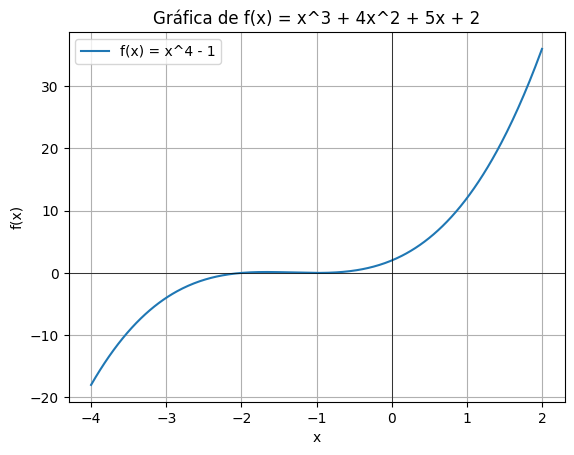

In [ ]:
# Definir la función
def f(x):
    return x**3 + 4*x**2 + 5*x +2

# Generar valores de x en el rango deseado
x = np.linspace(-4, 2, 400)

# Calcular los valores correspondientes de f(x)
y = f(x)

# Graficar la función
plt.plot(x, y, label='f(x) = x^4 - 1')
plt.axhline(0, color='black', linewidth=0.5)  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.5)  # Línea vertical en x=0
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) = x^3 + 4x^2 + 5x + 2')
plt.legend()
plt.grid(True)
plt.show()

#Calculo de raices para el polinomio con solo raices reales

In [ ]:

coeficientes = [1,-6,11,-6]
#P(x) = x^3 - 6x^2 + 11x - 6\)
a = 0
b = 1
epsilon = 1e-9
max_iterations = 100

roots = bisection_method_all_roots(coeficientes, a, b, epsilon, max_iterations)
print(roots)

[0.9999999990686774, 0.9999999995343387]


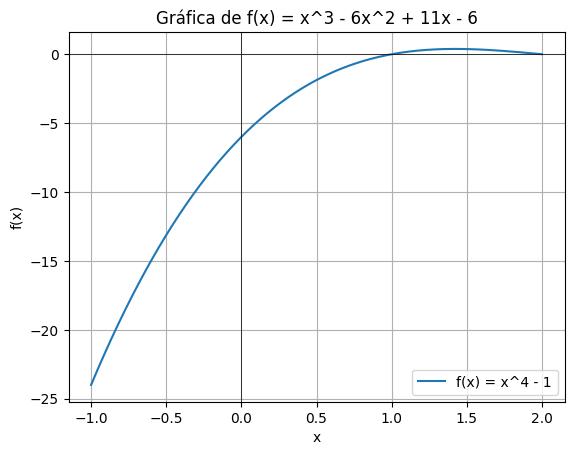

In [ ]:
# Definir la función
def f(x):
    return x**3 - 6*x**2 + 11*x - 6

# Generar valores de x en el rango deseado
x = np.linspace(-1, 2, 400)

# Calcular los valores correspondientes de f(x)
y = f(x)

# Graficar la función
plt.plot(x, y, label='f(x) = x^4 - 1')
plt.axhline(0, color='black', linewidth=0.5)  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.5)  # Línea vertical en x=0
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) = x^3 - 6x^2 + 11x - 6')
plt.legend()
plt.grid(True)
plt.show()